In [12]:
import sys
#
if "google.colab" in sys.modules:
    print (2)
    #!pip install -q git+https://github.com/theislab/cellrank

In [13]:
import numpy as np
import cellrank as cr
import scanpy as sc
import scanpy.external as sce
import scvelo as scv
import matplotlib.pyplot as plt
#
scv.settings.verbosity = 3
scv.settings.set_figure_params("scvelo")

sc.settings.set_figure_params(frameon=False, dpi=200)
cr.settings.verbosity = 2

In [1]:
import numpy as np
import scipy.stats as st

import cellrank as cr
import scanpy as sc

cr.settings.verbosity = 2
sc.settings.set_figure_params(
    frameon=False,
    dpi=100,
)

In [2]:
cr.__version__

'2.0.4'

In [15]:
import warnings
#
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

# Skin fibroblasts

## Pseudotime (DPT & Palantir)

In [5]:
adata = sc.read("./04_Skin_Fibroblast/Skin_fibroblast.h5ad")
adata=adata.raw.to_adata()
adata

AnnData object with n_obs × n_vars = 21766 × 28250
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt', 'percent.ribo', 'percent_mito', 'percent_ribo', 'percent_mito_ribo', 'log10GenesPerUMI', 'outlier', 'scDblFinder.class', 'scDblFinder.score', 'RNA_snn_res.0.1', 'RNA_snn_res.0.3', 'RNA_snn_res.0.5', 'seurat_clusters', 'predicted.id', 'celltype', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_aRNA', 'nFeature_aRNA', 'RNA.weight', 'ATAC.weight', 'wsnn_res.0.1', 'wsnn_res.0.3', 'wsnn_res.0.5', 'ATAC_snn_res.0.1', 'ATAC_snn_res.0.3', 'ATAC_snn_res.0.5', 'S.Score', 'G2M.Score', 'Phase', 'stage'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'X_umap.atac', 'X_wnn.umap'
    obsp: 'distances'

In [6]:
new_cluster_names = {
    '0':'Fib.Lower',
    '1':'Fib.Upper',
    '2':'Fib.Origin',
    '3':'Fib.Muscle',
    '4':'Fib.Inter',
    '5':'Fib.Deep',
    '6':'Chod',
    '7':'Fib.DC',
    '8':'Fib.Deep'
}

In [7]:
adata.obs['celltype_l2'] = adata.obs['RNA_snn_res.0.5'].astype("str").values
adata.obs['celltype_l2'] = adata.obs['celltype_l2'].map(new_cluster_names).astype('category')

In [ ]:
adata_sub = adata[~adata.obs['celltype_l2'].isin(["Chod"])]

In [ ]:
adata_sub.obs['celltype_l2']
adata_sub

In [ ]:
del adata
adata = adata_sub
adata

In [8]:
sc.pp.filter_genes(adata, min_cells=10)
adata

AnnData object with n_obs × n_vars = 21766 × 27099
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt', 'percent.ribo', 'percent_mito', 'percent_ribo', 'percent_mito_ribo', 'log10GenesPerUMI', 'outlier', 'scDblFinder.class', 'scDblFinder.score', 'RNA_snn_res.0.1', 'RNA_snn_res.0.3', 'RNA_snn_res.0.5', 'seurat_clusters', 'predicted.id', 'celltype', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_aRNA', 'nFeature_aRNA', 'RNA.weight', 'ATAC.weight', 'wsnn_res.0.1', 'wsnn_res.0.3', 'wsnn_res.0.5', 'ATAC_snn_res.0.1', 'ATAC_snn_res.0.3', 'ATAC_snn_res.0.5', 'S.Score', 'G2M.Score', 'Phase', 'stage', 'celltype_l2'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells'
    uns: 'neighbors'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'X_umap.atac', 'X_wnn.umap'
    obsp: 'distances'

In [9]:
# hvg annotation
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
print(f"This detected {adata.var['highly_variable'].sum()} highly variable genes. ")

This detected 2000 highly variable genes. 


In [10]:
adata

AnnData object with n_obs × n_vars = 21766 × 27099
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt', 'percent.ribo', 'percent_mito', 'percent_ribo', 'percent_mito_ribo', 'log10GenesPerUMI', 'outlier', 'scDblFinder.class', 'scDblFinder.score', 'RNA_snn_res.0.1', 'RNA_snn_res.0.3', 'RNA_snn_res.0.5', 'seurat_clusters', 'predicted.id', 'celltype', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_aRNA', 'nFeature_aRNA', 'RNA.weight', 'ATAC.weight', 'wsnn_res.0.1', 'wsnn_res.0.3', 'wsnn_res.0.5', 'ATAC_snn_res.0.1', 'ATAC_snn_res.0.3', 'ATAC_snn_res.0.5', 'S.Score', 'G2M.Score', 'Phase', 'stage', 'celltype_l2'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'hvg'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'X_umap.atac', 'X_wnn.umap'
    obsp: 'distances'

In [11]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30, random_state=0)
adata

AnnData object with n_obs × n_vars = 21766 × 27099
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'batch', 'percent.mt', 'percent.ribo', 'percent_mito', 'percent_ribo', 'percent_mito_ribo', 'log10GenesPerUMI', 'outlier', 'scDblFinder.class', 'scDblFinder.score', 'RNA_snn_res.0.1', 'RNA_snn_res.0.3', 'RNA_snn_res.0.5', 'seurat_clusters', 'predicted.id', 'celltype', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_aRNA', 'nFeature_aRNA', 'RNA.weight', 'ATAC.weight', 'wsnn_res.0.1', 'wsnn_res.0.3', 'wsnn_res.0.5', 'ATAC_snn_res.0.1', 'ATAC_snn_res.0.3', 'ATAC_snn_res.0.5', 'S.Score', 'G2M.Score', 'Phase', 'stage', 'celltype_l2'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'hvg', 'pca'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'X_umap.atac', 'X_wnn.umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

* diffusion map

In [ ]:
sc.tl.diffmap(adata)
adata

In [ ]:
adata.obsm['X_diffmap'][:, 2].argmax()

In [ ]:
root_ixs = 4749  # has been found using `adata.obsm['X_diffmap'][:, 3].argmax()`
scv.pl.scatter(
    adata,
    basis="diffmap",
    c=["celltype_l2", root_ixs],
    legend_loc="right",
    components=["1, 2"],
)
adata
adata.uns["iroot"] = root_ixs

In [ ]:
adata

In [26]:
sc.write("./04_Skin_Fibroblast/root_again.h5ad",adata)

In [ ]:
sc.tl.dpt(adata)
sc.pl.embedding(
    adata,
    basis="X_umap",
    color=["dpt_pseudotime", "celltype"],
    color_map="gnuplot2",
)

In [ ]:
sce.tl.palantir(adata, n_components=5, knn=30)

/jdfssz1/ST_SUPERCELLS/P21Z10200N0090/Automated/USER/chenxiaoya/miniconda/envs/python311/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/jdfssz1/ST_SUPERCELLS/P21Z10200N0090/Automated/USER/chenxiaoya/miniconda/envs/python311/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/jdfssz1/ST_SUPERCELLS/P21Z10200N0090/Automated/USER/chenxiaoya/miniconda/envs/python311/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/jdfssz1/ST_SUPERCELLS/P21Z10200N0090/Automated/USER/chenxiaoya/miniconda/envs/python311/lib/python3.11/site-packages/pandas/core/arrays

In [8]:
adata.obsm['X_palantir_diff_comp'][:, 2].argmax()

911

In [9]:
adata.obs.iloc[911]

orig.ident               E13_HU2
nCount_RNA            6449.60855
nFeature_RNA                3256
batch                    E13_HU2
percent.mt              0.866728
percent.ribo            0.410622
percent_mito            0.866728
percent_ribo            0.410622
percent_mito_ribo       1.277351
log10GenesPerUMI        0.922077
outlier                        0
scDblFinder.class        singlet
scDblFinder.score       0.007209
RNA_snn_res.0.1                1
RNA_snn_res.0.3                1
RNA_snn_res.0.5                2
seurat_clusters                2
predicted.id         Fibroblasts
celltype                       2
nCount_ATAC               6579.0
nFeature_ATAC               4747
nCount_aRNA              12619.0
nFeature_aRNA               4045
RNA.weight               0.04751
ATAC.weight              0.95249
wsnn_res.0.1                   1
wsnn_res.0.3                  15
wsnn_res.0.5                   4
ATAC_snn_res.0.1               0
ATAC_snn_res.0.3               5
ATAC_snn_r

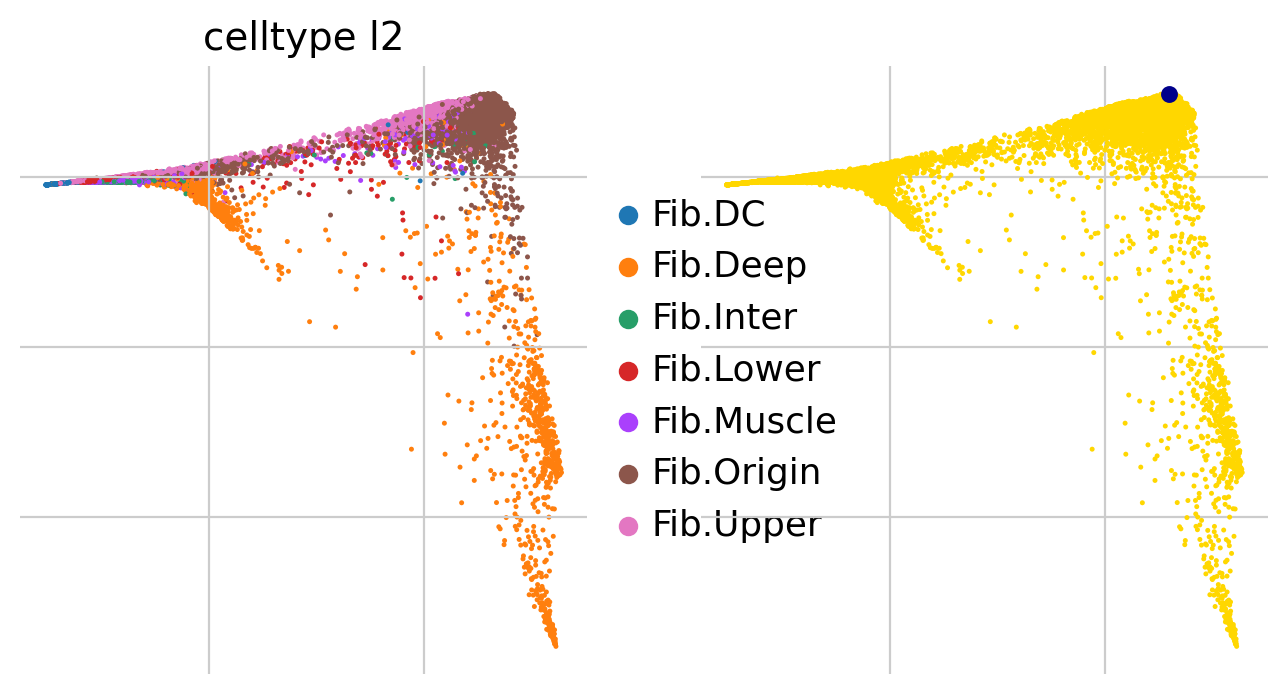

In [10]:
scv.pl.scatter(
    adata,
    basis="X_palantir_diff_comp",
    c=["celltype_l2", 911],
    legend_loc="right",
    components=["2, 3"],
)

In [5]:
adata = sc.read("./04_Skin_Fibroblast/palantir.h5ad")

In [6]:
start_cell = 'E13_HU2_BC0503_N04'
pr_res = sce.tl.palantir_results(
    adata,
    early_cell=start_cell,
    ms_data='X_palantir_multiscale',
    num_waypoints=500,
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.03163585662841797 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 9.501654287179312 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9998
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [7]:
adata.obs['palantir_pseudotime']=pr_res.pseudotime

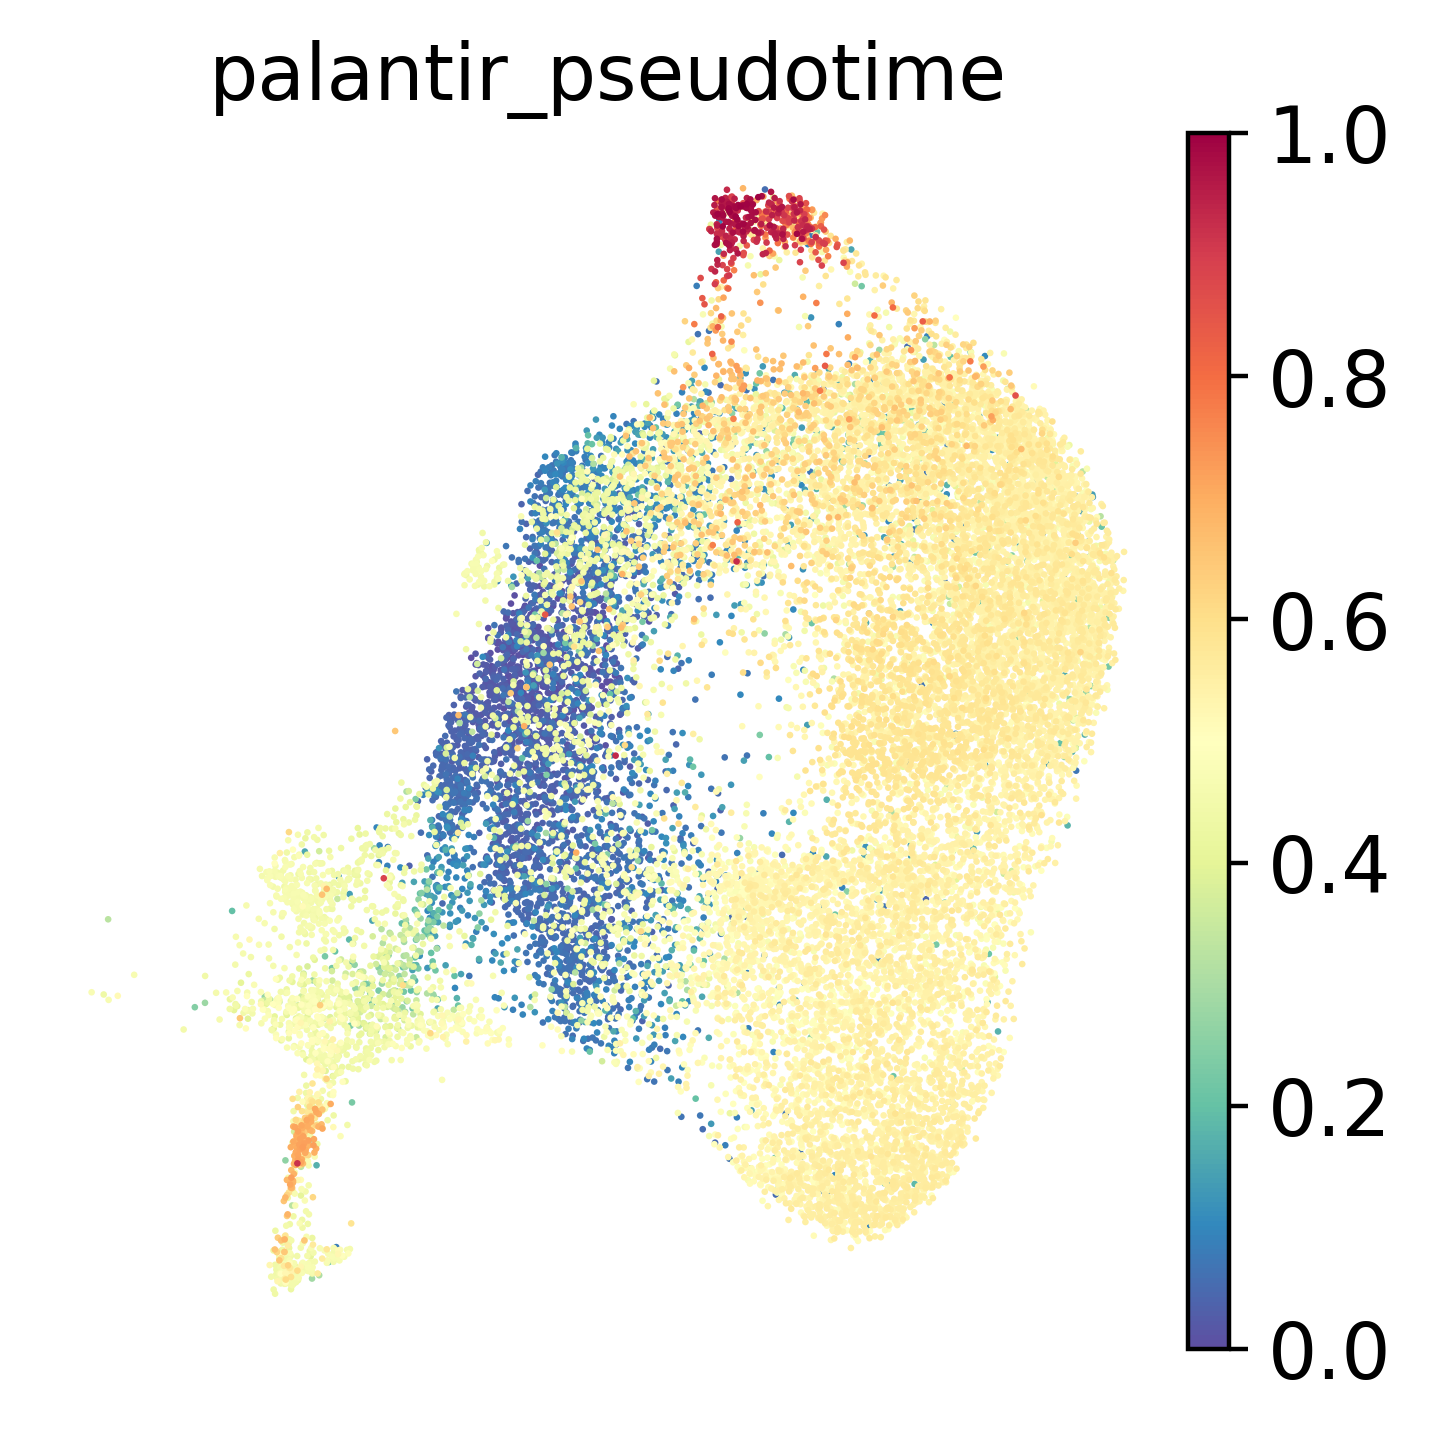

In [50]:
sc.pl.embedding(
    adata,
    basis="X_umap",
    color=["palantir_pseudotime"],
    color_map="Spectral_r",
    show= False
)
plt.savefig("./04_Skin_Fibroblast/pseudotime_palantir.pdf",bbox_inches='tight')

In [10]:
pk = cr.kernels.PseudotimeKernel(adata, time_key="palantir_pseudotime")
pk.compute_transition_matrix()

print(pk)

Computing transition matrix based on pseudotime


  0%|          | 0/21116 [00:00<?, ?cell/s]

    Finish (0:00:12)
PseudotimeKernel[n=21116]


Using precomputed projection `adata.obsm['T_fwd_umap']`


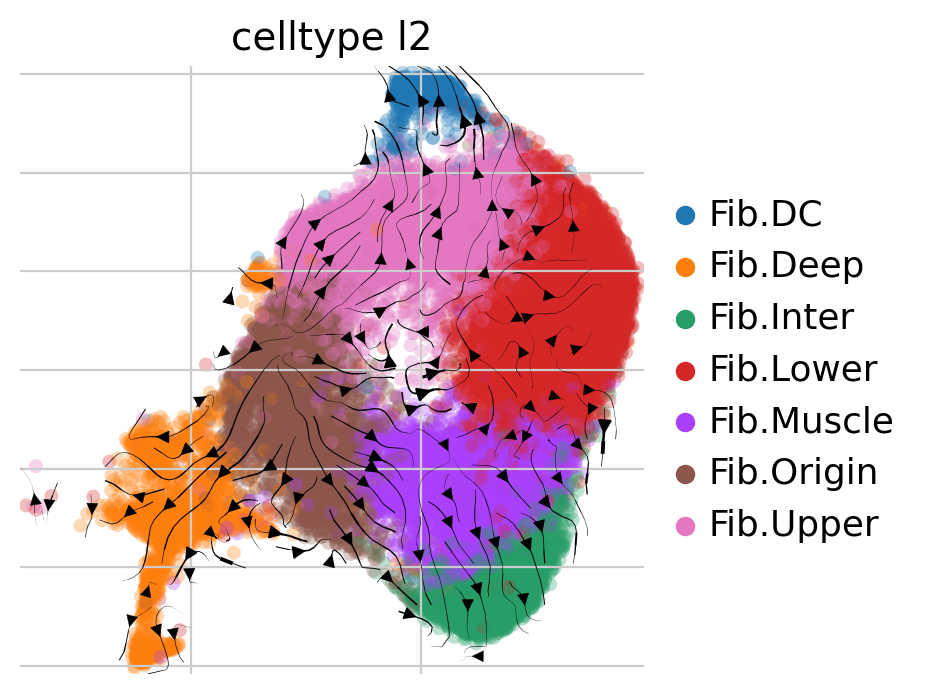

In [18]:
pk.plot_projection(basis="X_umap", color="celltype_l2", legend_loc="right",density=1.5)

In [16]:
adata=sc.read("./04_Skin_Fibroblast/after_cluster_trend_test.h5ad")

In [17]:
model = cr.models.GAMR(adata)

Computing trends using `1` core(s)


  0%|          | 0/41 [00:00<?, ?gene/s]

    Finish (0:00:51)
Plotting trends


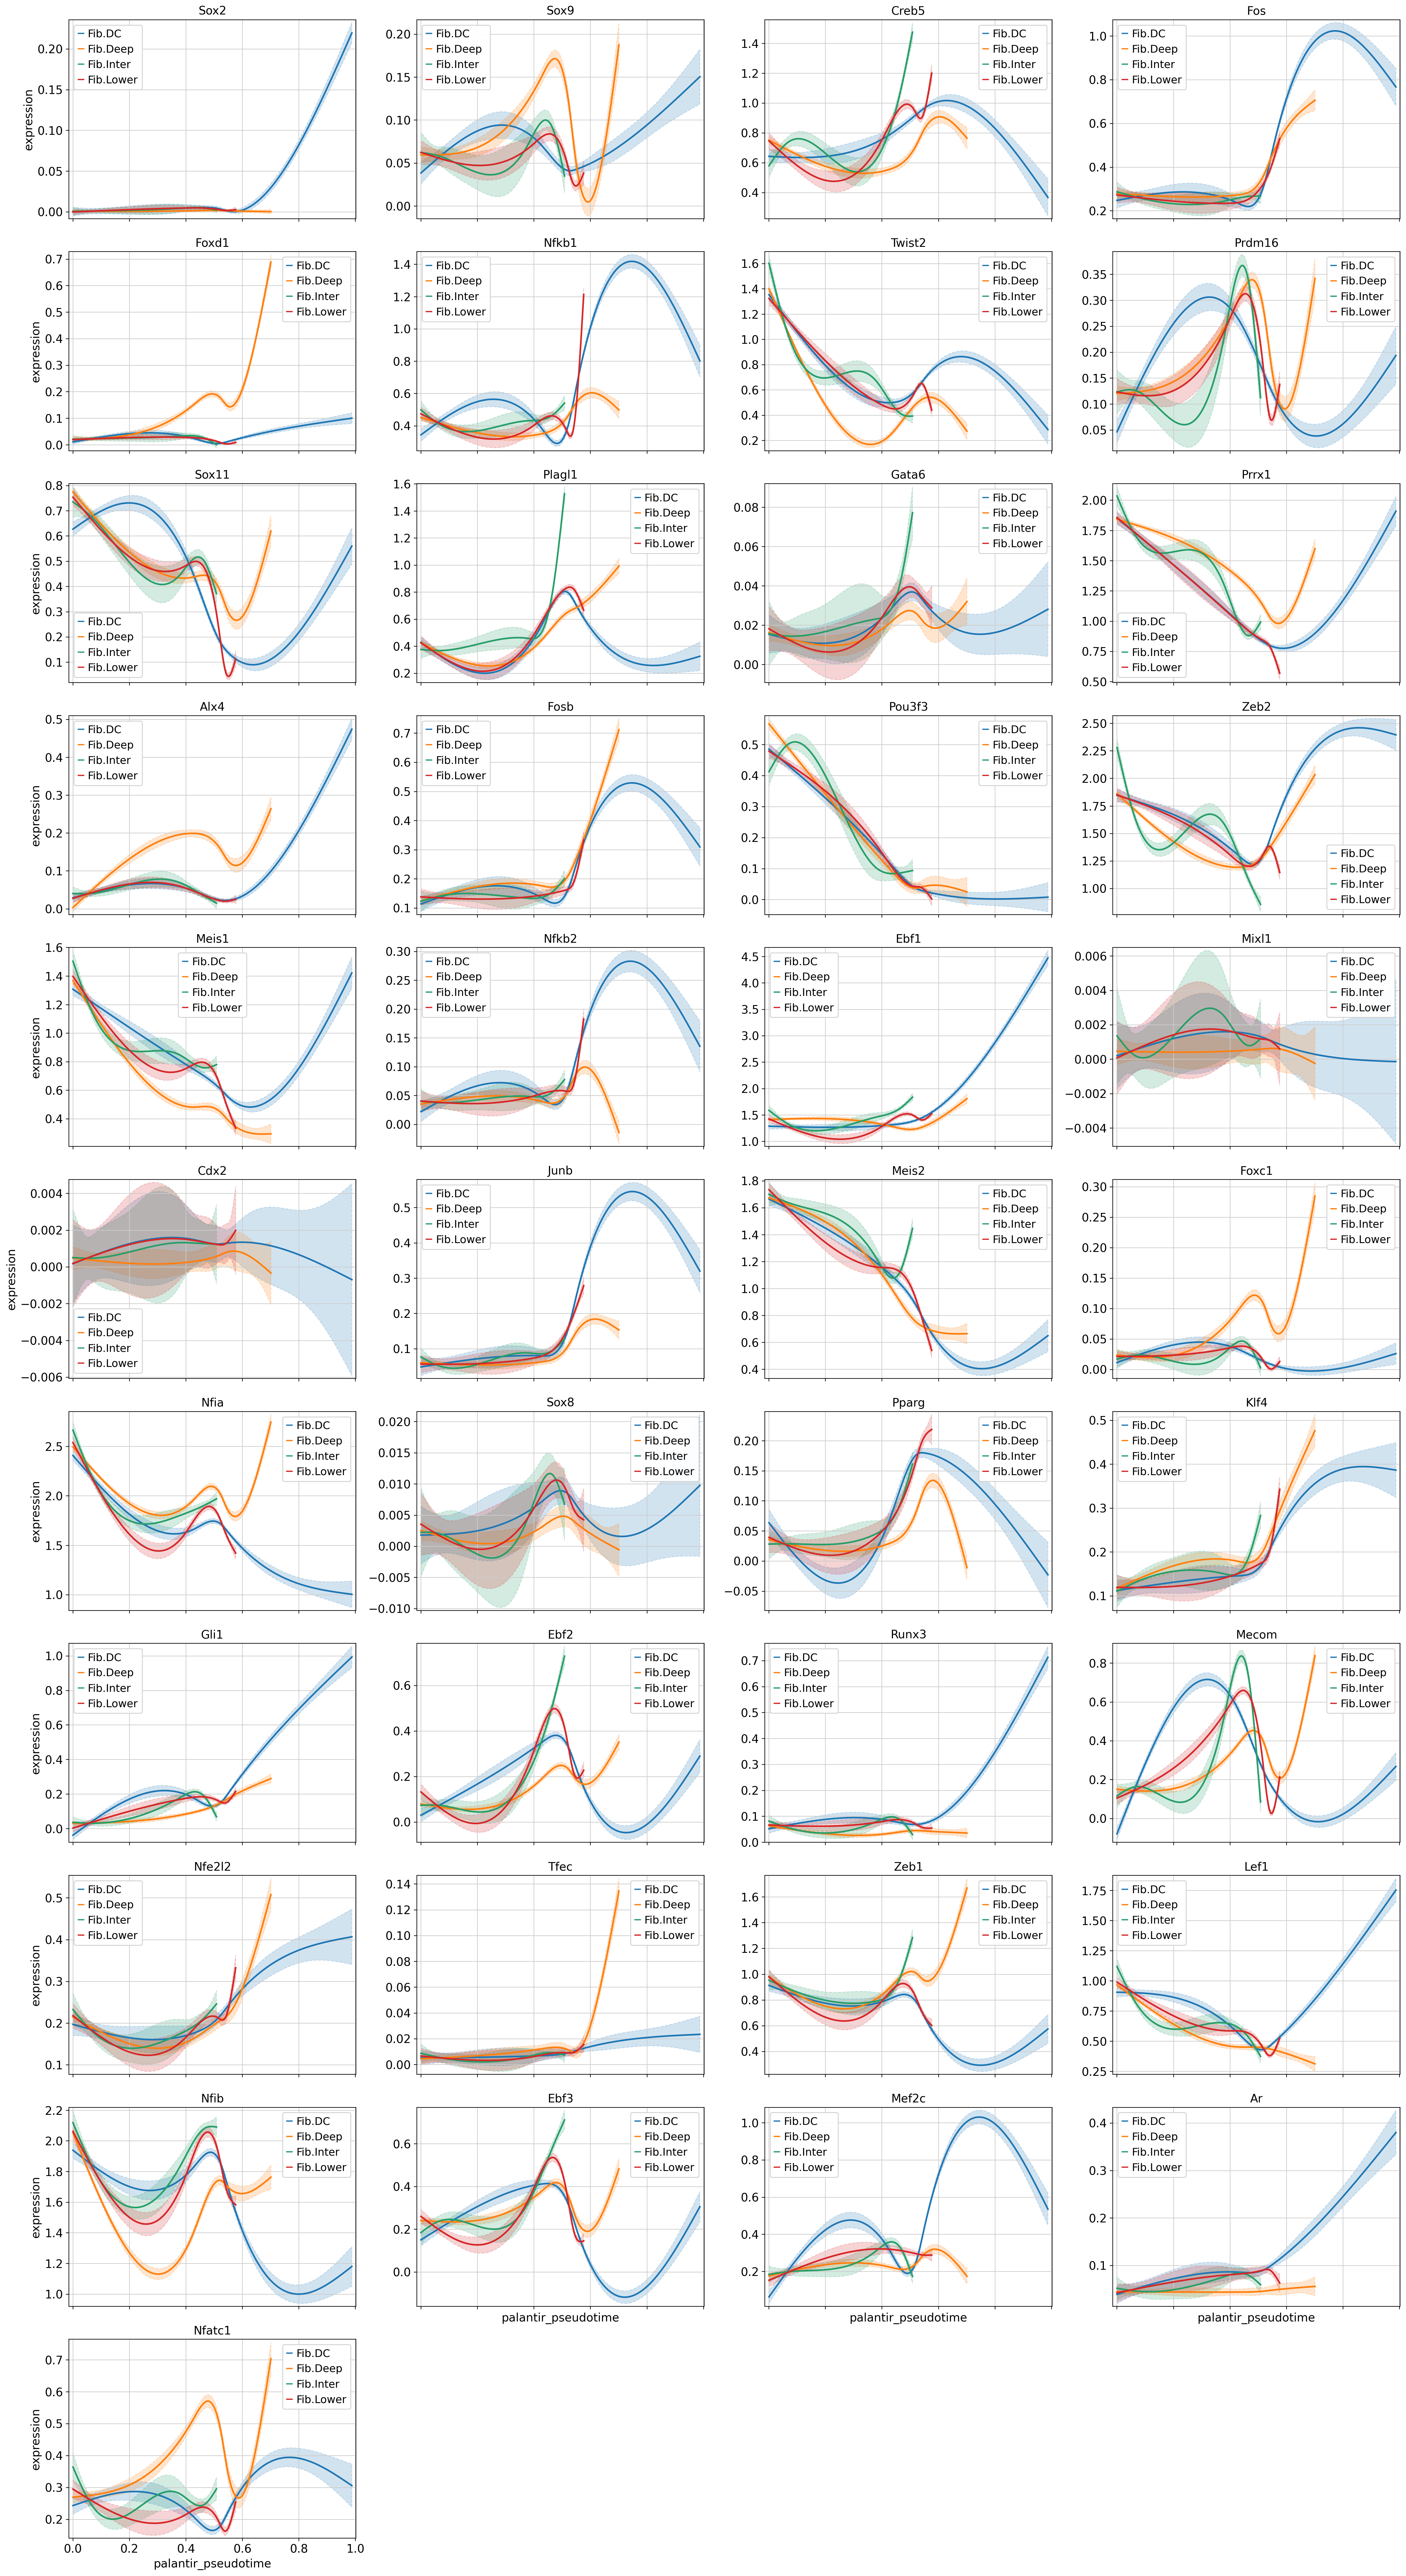

In [28]:
cr.pl.gene_trends(
    adata,
    model=model,
    genes=['Sox2','Sox9', 'Creb5', 'Fos', 'Foxd1', 'Nfkb1', 'Twist2', 'Prdm16', 'Sox11', 
    'Plagl1', 'Gata6', 'Prrx1', 'Alx4', 'Fosb', 'Pou3f3', 'Zeb2', 'Meis1', 
    'Nfkb2', 'Ebf1', 'Mixl1', 'Cdx2', 'Junb', 'Meis2', 'Foxc1', 
    'Nfia', 'Sox8', 'Pparg', 'Klf4', 'Gli1', 'Ebf2', 'Runx3', 'Mecom', 
    'Nfe2l2', 'Tfec', 'Zeb1', 'Lef1', 'Nfib', 'Ebf3', 'Mef2c', 'Ar', 'Nfatc1'],
    same_plot=True,
    ncols=4,
    time_key="palantir_pseudotime",
    hide_cells=True,
    save="./04_Skin_Fibroblast/gene_trends.pdf"
)

In [27]:
plt.savefig("./04_Skin_Fibroblast/gene_trends.pdf")

<Figure size 400x400 with 0 Axes>